In [245]:
import datetime
from pylab import rcParams
import statsmodels.api as sm
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizing 2020 FitBit data
* Units of measurement that represent time are in hours. For example, 10.33 would be 10 hours and 33 minutes.

In [246]:
#Import both fitbit datasets
data = pd.read_csv('FitData_2020.csv', parse_dates=True, index_col='Date')
data_woOutliers = pd.read_csv('FitData_2020(OutliersRemoved).csv', parse_dates=True, index_col='Date')

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 342 entries, 2020-01-01 to 2020-12-25
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Calories Burned           342 non-null    int64  
 1   Steps                     342 non-null    int64  
 2   Distance(Miles)           342 non-null    float64
 3   Floors                    342 non-null    int64  
 4   Time Sedentary            342 non-null    float64
 5   Lightly Active(Fat Burn)  342 non-null    float64
 6   Fairly Active(Cardio)     342 non-null    int64  
 7   Very Active(Peak)         342 non-null    int64  
 8   Activity Calories         342 non-null    int64  
 9   Start Time                342 non-null    object 
 10  End Time                  342 non-null    object 
 11  Time Asleep               342 non-null    float64
 12  Time Awake                342 non-null    float64
 13  Number of Awakenings      342 non-null    int6

In [248]:
data_woOutliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276 entries, 2020-01-01 to 2020-12-24
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Calories Burned           276 non-null    int64  
 1   Steps                     276 non-null    int64  
 2   Distance(Miles)           276 non-null    float64
 3   Floors                    276 non-null    int64  
 4   Time Sedentary            276 non-null    float64
 5   Lightly Active(Fat Burn)  276 non-null    float64
 6   Fairly Active(Cardio)     276 non-null    int64  
 7   Very Active(Peak)         276 non-null    int64  
 8   Activity Calories         276 non-null    int64  
 9   Start Time                276 non-null    object 
 10  End Time                  276 non-null    object 
 11  Time Asleep               276 non-null    float64
 12  Time Awake                276 non-null    float64
 13  Number of Awakenings      276 non-null    int6

In [249]:
#View first 5 rows of dataset with outliers
data.head()

,Calories Burned,Steps,Distance(Miles),Floors,Time Sedentary,Lightly Active(Fat Burn),Fairly Active(Cardio),Very Active(Peak),Activity Calories,Start Time,End Time,Time Asleep,Time Awake,Number of Awakenings,Time in Bed,REM Sleep,Light Sleep,Deep Sleep
Date,,,,,,,,,,,,,,,,,,
2020-01-01,2736,10201,4.46,6,10.33,5.41,10,24,1482,2020-01-01,2020-01-01,5.34,1.38,20,7.12,0.47,4.02,0.45
2020-01-02,2637,9539,4.25,4,10.08,4.52,31,2,1302,2020-01-01,2020-01-02,6.54,1.33,33,8.27,0.50,5.46,0.18
2020-01-03,2656,11394,4.75,5,12.30,4.02,32,27,1328,2020-01-02,2020-01-03,5.31,0.58,27,6.29,0.31,4.38,0.22
2020-01-04,2934,17150,7.20,6,9.01,4.54,16,36,1657,2020-01-03,2020-01-04,7.44,1.29,36,9.13,1.24,5.41,0.39
2020-01-05,2961,18607,7.82,11,7.32,4.30,18,48,1651,2020-01-04,2020-01-05,8.46,2.06,46,10.52,1.19,6.41,0.46


In [250]:
#View first 5 rows of dataset without outliers
data_woOutliers.head()

,Calories Burned,Steps,Distance(Miles),Floors,Time Sedentary,Lightly Active(Fat Burn),Fairly Active(Cardio),Very Active(Peak),Activity Calories,Start Time,End Time,Time Asleep,Time Awake,Number of Awakenings,Time in Bed,REM Sleep,Light Sleep,Deep Sleep
Date,,,,,,,,,,,,,,,,,,
2020-01-01,2736,10201,4.46,6,10.33,5.41,10,24,1482,2020-01-01,2020-01-01,5.34,1.38,20,7.12,0.47,4.02,0.45
2020-01-02,2637,9539,4.25,4,10.08,4.52,31,2,1302,2020-01-01,2020-01-02,6.54,1.33,33,8.27,0.50,5.46,0.18
2020-01-03,2656,11394,4.75,5,12.30,4.02,32,27,1328,2020-01-02,2020-01-03,5.31,0.58,27,6.29,0.31,4.38,0.22
2020-01-04,2934,17150,7.20,6,9.01,4.54,16,36,1657,2020-01-03,2020-01-04,7.44,1.29,36,9.13,1.24,5.41,0.39
2020-01-06,2174,7296,3.23,5,13.33,2.43,15,9,782,2020-01-05,2020-01-06,6.06,1.14,23,7.20,0.59,4.22,0.45


## View summary statistics

In [178]:
data.describe()

,Calories Burned,Steps,Distance(Miles),Floors,Time Sedentary,Lightly Active(Fat Burn),Fairly Active(Cardio),Very Active(Peak),Activity Calories,Time Asleep,Time Awake,Number of Awakenings,Time in Bed,REM Sleep,Light Sleep,Deep Sleep
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,2489.912281,8407.877193,4.129444,10.304094,12.168421,3.819152,16.733918,19.286550,1146.634503,5.437368,0.800000,23.491228,6.463947,0.805936,3.769825,0.588567
std,410.272699,4103.700325,2.351300,11.047269,2.135030,1.117462,21.041001,23.262995,475.734953,1.482777,0.424395,8.358793,1.866875,0.404068,0.917458,0.356733
min,594.000000,298.000000,0.130000,0.000000,0.000000,0.210000,0.000000,0.000000,61.000000,0.590000,0.010000,0.000000,1.050000,0.080000,1.320000,0.000000
25%,2190.250000,5117.750000,2.280000,3.000000,11.070000,3.190000,0.000000,0.000000,796.500000,4.527500,0.480000,19.000000,5.450000,0.452500,3.270000,0.370000
50%,2432.500000,7702.500000,3.505000,6.000000,12.260000,4.050000,11.000000,7.000000,1100.500000,5.510000,0.590000,23.500000,6.545000,0.590000,4.020000,0.490000
75%,2760.000000,11327.250000,5.657500,13.000000,13.377500,4.397500,25.750000,35.750000,1466.750000,6.340000,1.110000,29.000000,7.397500,1.167500,4.307500,1.000000
max,3945.000000,21386.000000,11.270000,60.000000,17.480000,7.500000,164.000000,103.000000,2943.000000,9.090000,4.520000,64.000000,19.100000,2.200000,7.070000,2.030000


In [195]:
data_woOutliers.describe()

,Calories Burned,Steps,Distance(Miles),Floors,Time Sedentary,Lightly Active(Fat Burn),Fairly Active(Cardio),Very Active(Peak),Activity Calories,Time Asleep,Time Awake,Number of Awakenings,Time in Bed,REM Sleep,Light Sleep,Deep Sleep
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,2426.000000,7796.141304,3.723841,8.021739,12.362065,3.761957,12.942029,15.315217,1068.028986,5.559203,0.806630,23.909420,6.574529,0.815870,3.762029,0.587572
std,325.269634,3575.180144,1.970808,7.025633,1.735667,1.017042,14.353343,20.125748,384.344929,1.208215,0.346821,6.491599,1.406252,0.387086,0.894674,0.343786
min,1792.000000,1746.000000,0.780000,0.000000,7.460000,1.260000,0.000000,0.000000,302.000000,2.200000,0.150000,3.000000,2.460000,0.080000,1.430000,0.040000
25%,2179.500000,4924.250000,2.190000,3.000000,11.257500,3.170000,0.000000,0.000000,782.750000,5.057500,0.490000,19.750000,5.545000,0.467500,3.270000,0.360000
50%,2389.500000,7073.500000,3.230000,6.000000,12.320000,4.010000,9.000000,4.000000,1045.000000,5.535000,0.795000,24.000000,6.570000,1.000000,4.025000,0.490000
75%,2657.500000,10562.250000,4.970000,10.250000,13.382500,4.370000,20.000000,28.000000,1331.250000,6.322500,1.110000,29.000000,7.380000,1.170000,4.330000,1.000000
max,3460.000000,20162.000000,10.420000,30.000000,16.350000,6.340000,62.000000,82.000000,2259.000000,8.370000,1.470000,39.000000,9.550000,1.560000,6.070000,1.330000


## Scatter Plot (Distance vs Sleep metrics)

In [181]:
#Pass columns of interest into variables
x1 = data['Distance(Miles)']
y_cols =  ['Time Asleep', 'Light Sleep', 'REM Sleep', 'Deep Sleep']

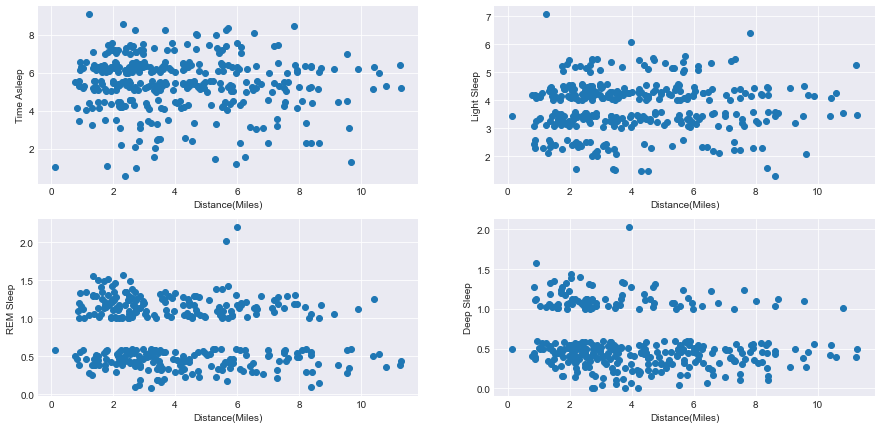

In [182]:
#Create the scatter plot
plt.figure(figsize=(15, 15))
cnt = 1
for y in y_cols:
    plt.subplot(4,2, cnt)
    plt.scatter(x1,data[y])
    plt.ylabel(y)
    plt.xlabel('Distance(Miles)')
    cnt=cnt+1
plt.show()

## Heatmap visual to show correlation among columns

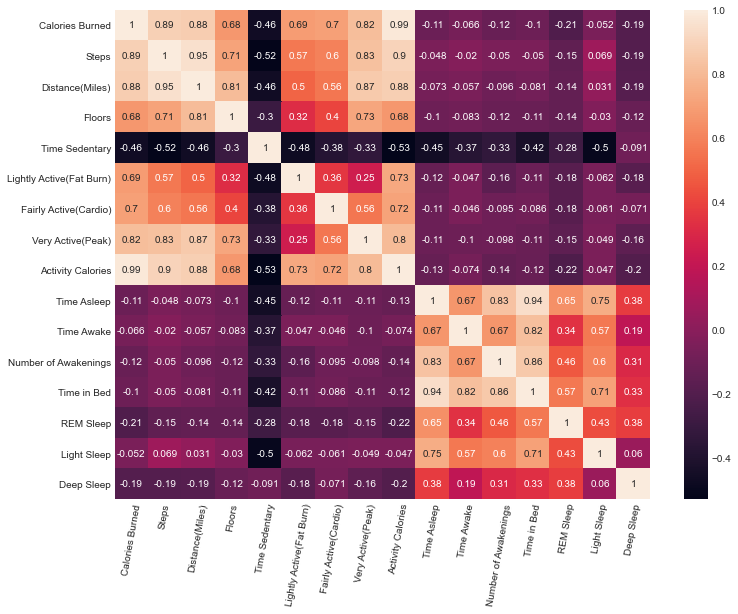

In [183]:
# Create the correalation
data_corr = data.corr()

#Plot the correlation
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(data_corr, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
plt.show()

## Simple line plot for Time Asleep

<AxesSubplot:xlabel='Date'>

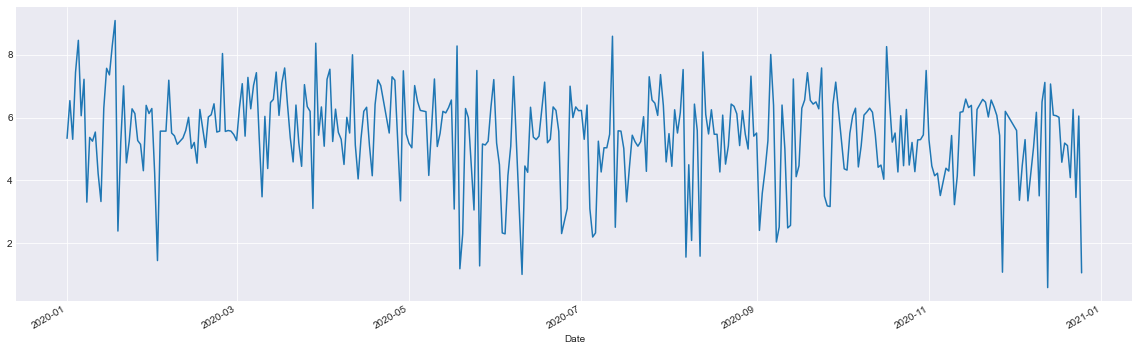

In [184]:
#Create plot
data['Time Asleep'].plot(figsize=(20, 6))

## Decomposition line plot of Distance

In [256]:
#Must to specify the interval of data collection by setting the frequency to day and filling in any missing values with the value in the previous row.
data_day = data.asfreq('d', method = 'ffill')

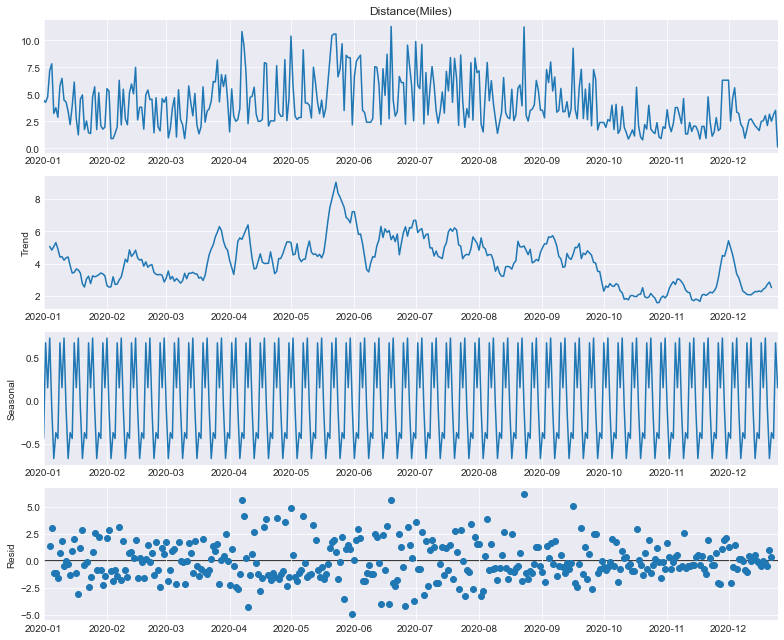

In [257]:

decomposition = sm.tsa.seasonal_decompose(data_day['Distance(Miles)'], model='Additive')
fig = decomposition.plot()
plt.show()

## Visualize trend in Distance using rolling means

In [270]:
#Create trend of distance using rolling means to be used in the next visual
data_distance = ['Distance(Miles)']
data_7d_rol = data[data_distance].rolling(window = 7, center = True).mean()
data_365d_rol = data[data_distance].rolling(window = 365, center = True).mean()

Text(0.5, 1.0, 'Distance in Miles by Day')

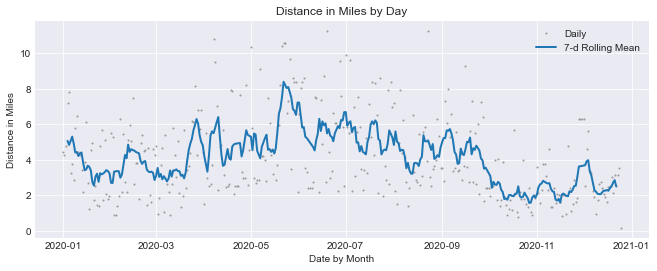

In [274]:
fig, ax = plt.subplots(figsize = (11,4))# plotting daily data
ax.plot(data_day['Distance(Miles)'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')# plotting 7-day rolling data
ax.plot(data_7d_rol['Distance(Miles)'], linewidth=2, label='7-d Rolling Mean')# plotting annual rolling data

ax.legend()
ax.set_xlabel('Date by Month')
ax.set_ylabel('Distance in Miles')
ax.set_title('Distance in Miles by Day')

## Expanding window line plot to visualize changing mean and standard deviation over time

In [188]:
#Pass columns of interest into variables
#Columns for this visual are from sleep data - 'Time Awake' represents the time I was restless throughout the night and not fully asleep
asleep_expand =  ['Time in Bed', 'Time Awake', 'Time Asleep', 'Light Sleep', 'REM Sleep', 'Deep Sleep']

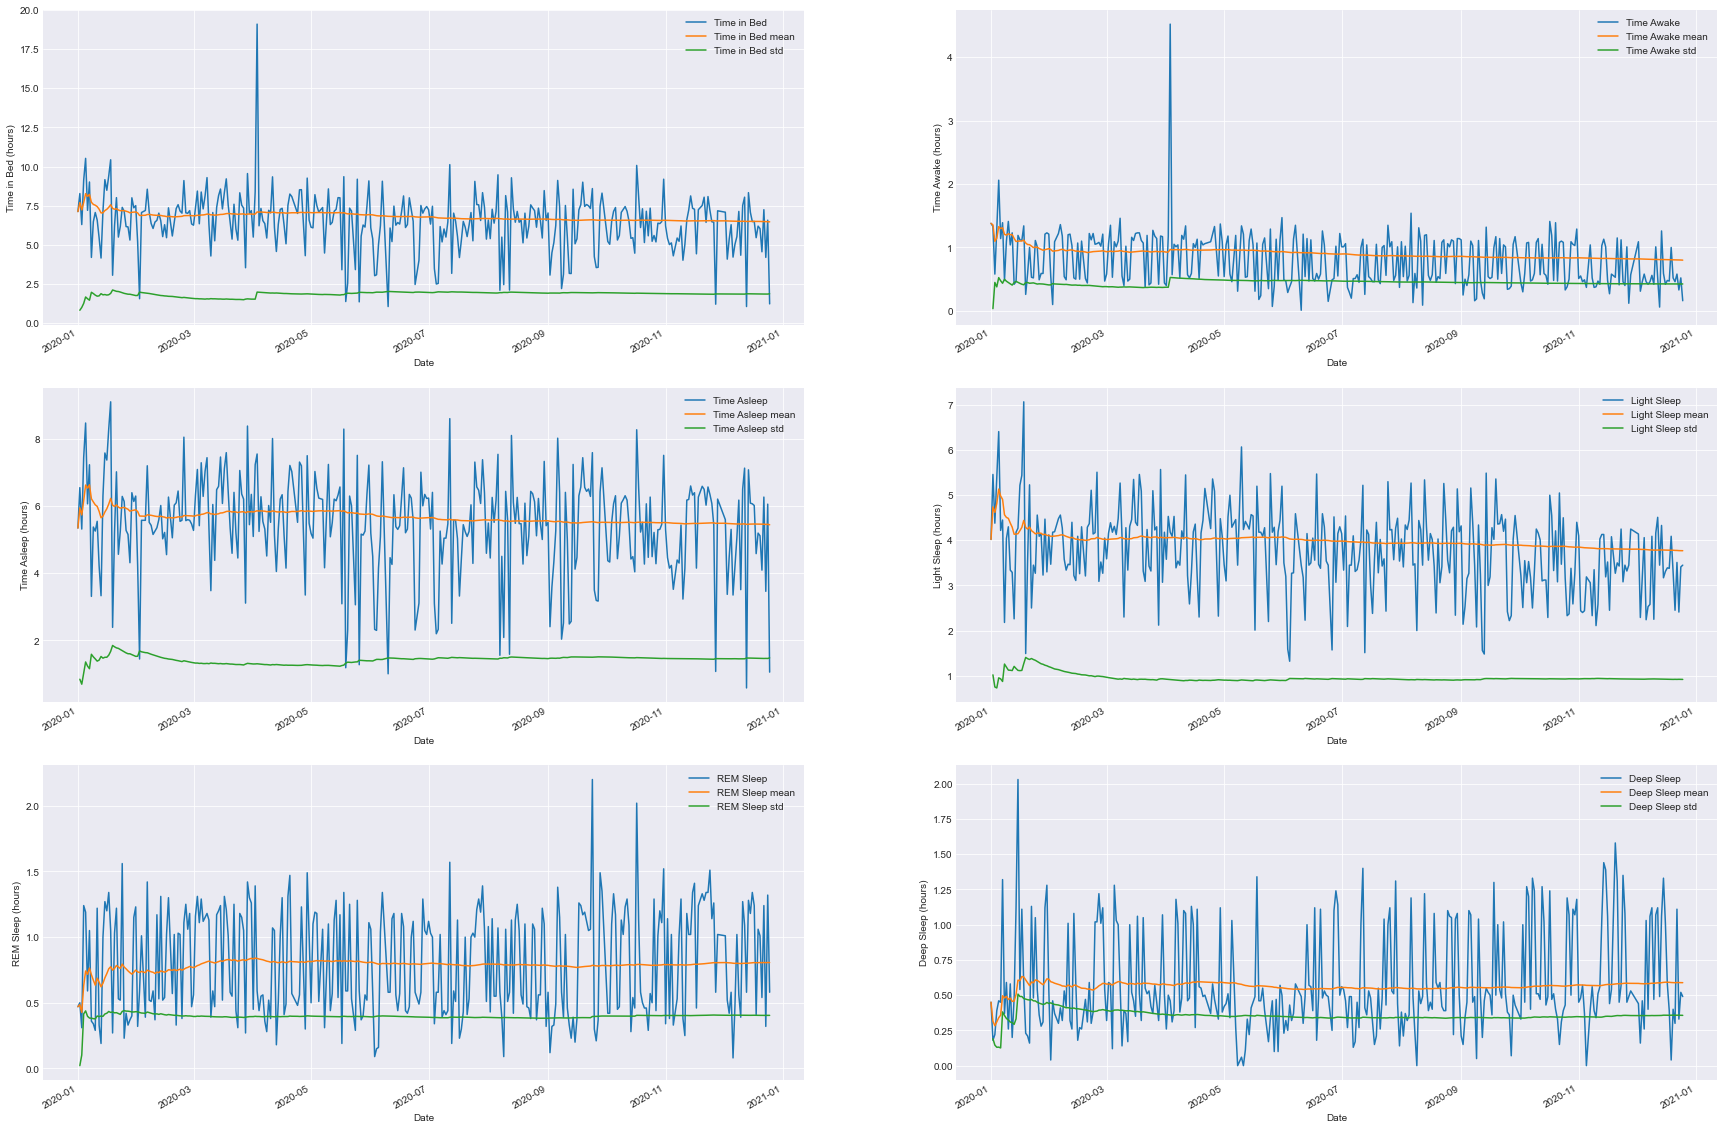

In [189]:
#Create the scatter plot
plt.figure(figsize=(30, 45))
cnt = 1
for x in asleep_expand:
    plt.subplot(6,2, cnt)
    data[x].plot(label=x)
    data[x].expanding().mean().plot(label= x + ' mean')
    data[x].expanding().std().plot(label= x + ' std')
    plt.ylabel(x +  ' (hours)')
    plt.xlabel('Date')
    cnt=cnt+1
    plt.legend()
plt.show()

In [211]:
#Pass columns of interest into variables
awake_expand =  ['Time Sedentary', 'Lightly Active(Fat Burn)', 'Fairly Active(Cardio)', 'Very Active(Peak)']

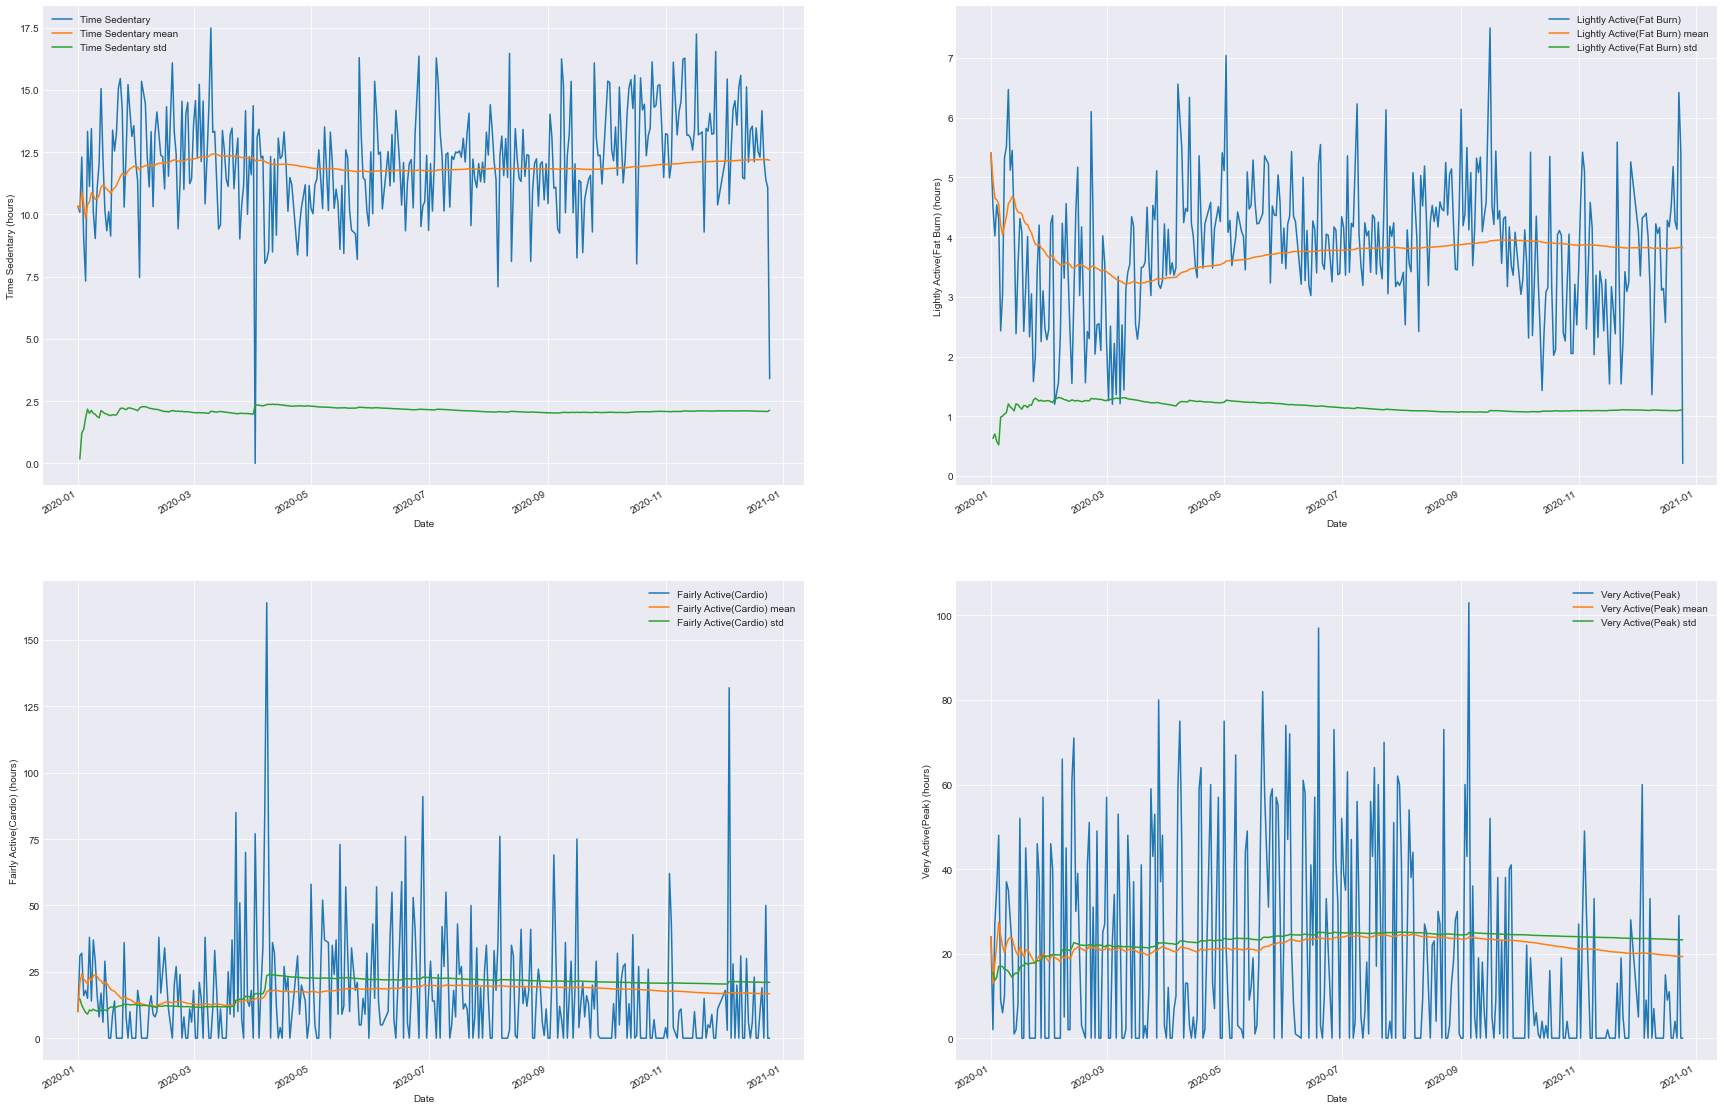

In [214]:
#Create the scatter plot
plt.figure(figsize=(30, 45))
cnt = 1
for x in awake_expand:
    plt.subplot(4,2, cnt)
    data[x].plot(label=x)
    data[x].expanding().mean().plot(label= x + ' mean')
    data[x].expanding().std().plot(label= x + ' std')
    plt.ylabel(x +  ' (hours)')
    plt.xlabel('Date')
    cnt=cnt+1
    plt.legend()
plt.show()